# ANES (American National Election Studies) Youth Political Lean Exploration

**Course:** AIPI 510 (Fall 2025)  

**Author:** Eugenia Tate

**Date:** September 29, 2025  

This notebook analyzes data from the **American National Election Studies (ANES) Guide to Public Opinion and Electoral Behavior**.  
The dataset contains counts of respondents identifying with different partisan groups (Strong Democrat → Strong Republican), broken down by demographic subgroups (e.g., age, gender, education) and year.

## 1. Data Context

This file comes from the **ANES Guide to Public Opinion and Electoral Behavior**.  https://electionstudies.org/data-tools/anes-guide/anes-guide.html?chart=party_identification_7_pt&utm_source=chatgpt.com 
It includes survey data from 1952 onward, showing partisan identification by demographic groups.  
I focused on **age groups** (18–29, 30–44, 45–59, 60+) to explore whether younger voters are increasingly leaning Republican in recent years.

## 2. What Do the Columns Mean

- **Year**: Survey year (1952 till present)  
- **Demographics**: Category type (age, race, gender, political id etc.)  
- **Subgroup**: Specific group within the demographic (e.g., men/women, race, "18–29")  
- **Total Cases**: Number of respondents in that subgroup  
- **Party ID columns**: Counts of respondents identifying as:  
  - Strong Democrat  
  - Weak Democrat  
  - Independent Democrat  
  - Independent Independent  
  - Independent Republican  
  - Weak Republican  
  - Strong Republican  

In [6]:
# Step 3: Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset and read it into a dataframe
file = "The Guide to Public Opinion and Electoral Behavior.csv"
df = pd.read_csv(file)

# number of rows and columns
print("Dataset shape (rows, columns):", df.shape)
df.head(10)

Dataset shape (rows, columns): (5014, 11)


,Demographics,Subgroup,Total Cases,Year,Strong Democrat,Weak Democrat,Independent Democrat,Independent Independent,Independent Republican,Weak Republican,Strong Republican
0,All,All,1689.0,1952,392.0,435.0,173.0,83.0,128.0,237.0,241.0
1,All,All,1088.0,1954,248.0,288.0,97.0,82.0,68.0,159.0,146.0
2,All,All,1690.0,1956,364.0,402.0,111.0,155.0,146.0,250.0,262.0
3,All,All,1737.0,1958,480.0,405.0,125.0,131.0,94.0,298.0,204.0
4,All,All,1864.0,1960,389.0,476.0,121.0,188.0,128.0,263.0,299.0
5,All,All,1237.0,1962,297.0,300.0,93.0,100.0,80.0,209.0,158.0
6,All,All,1536.0,1964,417.0,385.0,144.0,121.0,88.0,210.0,171.0
7,All,All,1263.0,1966,230.0,354.0,115.0,157.0,90.0,194.0,123.0
8,All,All,1531.0,1968,311.0,394.0,153.0,163.0,135.0,226.0,149.0
9,All,All,1490.0,1970,298.0,357.0,156.0,194.0,117.0,230.0,138.0


## 4. Data Structure & Descriptive Statistics

Before analysis, it’s important to check dataset size, column types, and subgroup values.  
I focused on rows where `Demographics == "age"` and Subgroup is any of the (18–29, 30–44, 45–59, 60+).

In [7]:
# Step 4: Data Structure & Descriptive Statistics

# column types and non-null counts
print("Column info:")
print(df.info())

# Unique demographic types
print("\nUnique Demographics:", df["Demographics"].unique())

# Unique subgroups (first 15)
print("\nUnique Subgroups (sample):", df["Subgroup"].unique()[:15])


Column info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5014 entries, 0 to 5013
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Demographics             5014 non-null   object 
 1   Subgroup                 5014 non-null   object 
 2   Total Cases              5014 non-null   float64
 3   Year                     5014 non-null   int64  
 4   Strong Democrat          3573 non-null   float64
 5   Weak Democrat            3574 non-null   float64
 6   Independent Democrat     3560 non-null   float64
 7   Independent Independent  3461 non-null   float64
 8   Independent Republican   3460 non-null   float64
 9   Weak Republican          3489 non-null   float64
 10  Strong Republican        3442 non-null   float64
dtypes: float64(8), int64(1), object(2)
memory usage: 431.0+ KB
None

Unique Demographics: ['All' 'pid' 'gender' 'education' 'race' 'age' 'region' 'knowledge'
 'pid and gender' '

## 5a. Data Quality Check

Here I check for missing values, duplicates, and ensure year coverage is consistent.

In [8]:
# Step 5: Data Quality Check

# Missing values
print("Missing values per column:")
print(df.isnull().sum())

# Duplicates
print("\nNumber of duplicate rows:", df.duplicated().sum())

# Year range
print("\nYear range:", df["Year"].min(), "to", df["Year"].max())

Missing values per column:
Demographics                  0
Subgroup                      0
Total Cases                   0
Year                          0
Strong Democrat            1441
Weak Democrat              1440
Independent Democrat       1454
Independent Independent    1553
Independent Republican     1554
Weak Republican            1525
Strong Republican          1572
dtype: int64

Number of duplicate rows: 0

Year range: 1952 to 2024


## 5b. Preprocessing 

**What I did:** 
- filtered dataset to include only rows where `Demographics == "age"`.  
- Selected age groups of interest: 18–29, 30–44, 45–59, 60+.  
- Replaced missing values with 0 in party columns.  
- Collapsed categories into Democrat, Independent, Republican.  
- Normalized counts into percentages by dividing by `Total Cases`.

In [9]:
# Step 5b: Preprocessing

# Keep only age rows
df_age = df[df["Demographics"] == "age"].copy()

# Replace NA with 0 in party ID columns
party_columns = [
    "Strong Democrat","Weak Democrat","Independent Democrat",
    "Independent Independent","Independent Republican","Weak Republican","Strong Republican"
]
df_age[party_columns] = df_age[party_columns].fillna(0)

# Combine sub categories into broader categories
df_age["Democrat"] = df_age[["Strong Democrat","Weak Democrat","Independent Democrat"]].sum(axis=1)
df_age["Republican"] = df_age[["Independent Republican","Weak Republican","Strong Republican"]].sum(axis=1)
df_age["Independent"] = df_age["Independent Independent"]

# Normalize to percentages
df_age["D %"] = df_age["Democrat"] / df_age["Total Cases"]
df_age["R %"] = df_age["Republican"] / df_age["Total Cases"]
df_age["I %"] = df_age["Independent"] / df_age["Total Cases"]

# Select only relevant columns for clean dataset
cleaned_dataset_columns = [
    "Year", "Subgroup", "Total Cases",
    "Democrat", "Republican", "Independent",
    "D %", "R %", "I %"
]

print(df_age.columns.to_list())

df_clean = df_age[cleaned_dataset_columns].copy()

# Save cleaned data to new CSV
cleaned_file = "anes_cleaned_data.csv"
df_clean.to_csv(cleaned_file, index=False)

print(f"Processed dataset saved with shape {df_clean.shape} at {cleaned_file}")
df_clean.head(32)

['Demographics', 'Subgroup', 'Total Cases', 'Year', 'Strong Democrat', 'Weak Democrat', 'Independent Democrat', 'Independent Independent', 'Independent Republican', 'Weak Republican', 'Strong Republican', 'Democrat', 'Republican', 'Independent', 'D %', 'R %', 'I %']
Processed dataset saved with shape (124, 9) at anes_cleaned_data.csv


,Year,Subgroup,Total Cases,Democrat,Republican,Independent,D %,R %,I %
368,1952,18-29,302.0,185.0,99.0,18.0,0.612583,0.327815,0.059603
369,1956,18-29,290.0,158.0,102.0,30.0,0.544828,0.351724,0.103448
370,1958,18-29,272.0,175.0,70.0,27.0,0.643382,0.257353,0.099265
371,1960,18-29,251.0,142.0,80.0,29.0,0.565737,0.318725,0.115538
372,1962,18-29,195.0,105.0,74.0,16.0,0.538462,0.379487,0.082051
373,1964,18-29,283.0,180.0,74.0,29.0,0.636042,0.261484,0.102473
374,1966,18-29,230.0,123.0,69.0,38.0,0.534783,0.300000,0.165217
375,1968,18-29,278.0,142.0,88.0,48.0,0.510791,0.316547,0.172662
376,1970,18-29,311.0,166.0,88.0,57.0,0.533762,0.282958,0.183280
377,1972,18-29,744.0,376.0,218.0,150.0,0.505376,0.293011,0.201613


## 6a. Visualization

I combined 7 party IDs into 3 groups:  
- **Democrat-leaning** = Strong D + Weak D + Independent D  
- **Independent** = Independent Independent  
- **Republican-leaning** = Independent R + Weak R + Strong R  

Then, calculated percentages within each subgroup and plotted trends for age groups.

I did the same for Democratic trends. 

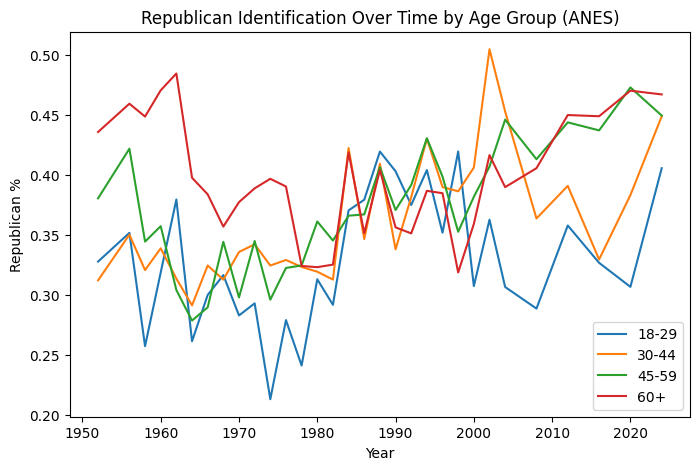

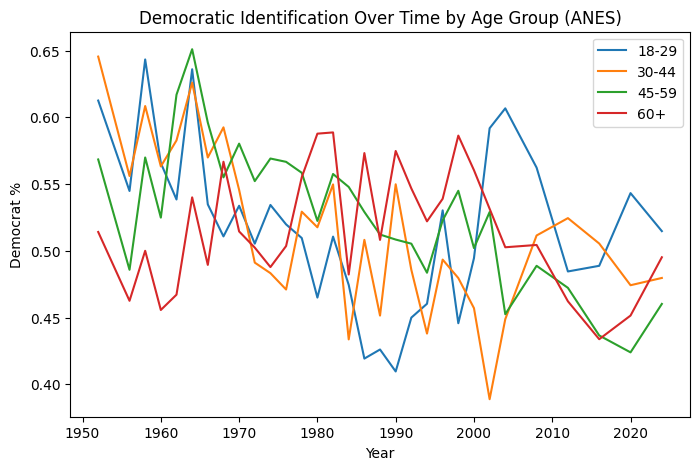

In [10]:
# Step 6: Visual Exploration

# Filter for age demographics only
df_age = df[df["Demographics"] == "age"].copy()

# Collapse party ID categories
df_age["Democrat"] = df_age[["Strong Democrat","Weak Democrat","Independent Democrat"]].sum(axis=1)
df_age["Republican"] = df_age[["Independent Republican","Weak Republican","Strong Republican"]].sum(axis=1)
df_age["Independent"] = df_age["Independent Independent"]

# Compute percentages
df_age["D %"] = df_age["Democrat"] / df_age["Total Cases"]
df_age["R %"] = df_age["Republican"] / df_age["Total Cases"]
df_age["I %"] = df_age["Independent"] / df_age["Total Cases"]

# Focus on 18–29 vs others
age_groups = ["18-29","30-44","45-59","60+"]
df_age = df_age[df_age["Subgroup"].isin(age_groups)]


# Plot Republican % over time by age group
plt.figure(figsize=(8,5))
for group in age_groups:
    subset = df_age[df_age["Subgroup"] == group]
    plt.plot(subset["Year"], subset["R %"], label=group)
plt.title("Republican Identification Over Time by Age Group (ANES)")
plt.ylabel("Republican %")
plt.xlabel("Year")
plt.legend()
plt.show()

# Plot Democrat % over time by age group
plt.figure(figsize=(8,5))
for group in age_groups:
    subset = df_age[df_age["Subgroup"] == group]
    plt.plot(subset["Year"], subset["D %"], label=group)
plt.title("Democratic Identification Over Time by Age Group (ANES)")
plt.ylabel("Democrat %")
plt.xlabel("Year")
plt.legend()
plt.show()

## 6b. Feature Engineering

To enhance analysis, I created new features:  

1. **Youth Lean Index (18–29)** = Republican % – Democrat %  
   - Shows whether youth tilt red (positive) or blue (negative).  

2. **Generational Gap** = Republican % (18–29) – Republican % (60+)  
   - Shows the difference in partisan lean between youth and seniors.  

3. **Red Wave Momentum (18–29)** = year-to-year change in Republican %  
   - Captures acceleration or decline of youth Republican support.  

In [ ]:
-- Step 6b: Feature Engineering

-- Focus only on relevant age groups
age_groups = ["18-29","30-44","45-59","60+"]
df_age = df_age[df_age["Subgroup"].isin(age_groups)].copy()

-- Youth Lean Index
youth = df_age[df_age["Subgroup"] == "18-29"].copy()
youth["Youth_Lean_Index"] = youth["R %"] - youth["D %"]

-- Generational Gap (youth vs seniors)
seniors = df_age[df_age["Subgroup"] == "60+"].copy()

-- For each year, look up youth % and seniors % manually
gen_gap = []
for year in youth["Year"]:
republican_youth = float(youth.loc[youth["Year"]== year. "R %"])
    if year in seniors["Year"].values:
        republican_senior = float(seniors.loc[seniors["Year"] == year, "R %"])
        gen_gap.append(republican_youth - republican_senior)
    else:
        gen_gap.append(np.nan)  
    
youth["Gen_Gap"] = gen_gap

-- Red Wave Momentum - year-over-year change within youth Republican % 
youth = youth.sort_values("Year")
youth["Youth_Red_Momentum"] = youth["R %"].diff()

-- Inspect results
print(youth.head(5))

# Youth Lean Index
plt.figure(figsize=(8,5))
plt.plot(youth["Year"], youth["Youth_Lean_Index"], marker="o")
plt.axhline(0, color="gray", linestyle="--")
plt.title("Youth Lean Index (18–29): Republican % - Democrat %")
plt.ylabel("Index (positive = red, negative = blue)")
plt.xlabel("Year")
plt.show()

# Generational Gap
plt.figure(figsize=(8,5))
plt.plot(youth["Year"], youth["Gen_Gap"], marker="o", color="orange")
plt.axhline(0, color="gray", linestyle="--")
plt.title("Generational Gap: Republican % (Youth - Seniors)")
plt.ylabel("Gap (positive = youth more red)")
plt.xlabel("Year")
plt.show()

# Youth Red Wave Momentum
plt.figure(figsize=(8,5))
plt.bar(youth["Year"], youth["Youth_Red_Momentum"], color="red")
plt.axhline(0, color="gray", linestyle="--")
plt.title("Youth Red Wave Momentum (Year-over-Year Change in Rep%)")
plt.ylabel("Δ Republican % (18–29)")
plt.xlabel("Year")
plt.show()

,Youth_Lean_Index,Gen_Gap,Youth_Red_Momentum
Subgroup,,,
Year,,,
1952,-0.284768,-0.107922,NaN
1956,-0.193103,-0.107559,0.023910
1958,-0.386029,-0.191218,-0.094371
1960,-0.247012,-0.151718,0.061372
1962,-0.158974,-0.104942,0.060762
1964,-0.374558,-0.136142,-0.118003
1966,-0.234783,-0.083803,0.038516
1968,-0.194245,-0.040401,0.016547



## 7. Key Takeaways

- Youth (18–29) have historically leaned more Democratic, but recent years show significant increase in Republican identification to the Reagan-era 1980s
- 30-44 year-olds also show a dramatic rightward shift by 2024 which suggests that millenials are becoming an important red-leaning bloc
- Older age groups (45+ and 60+) have consistently shown stronger Republican support with insignificant drop in 2024 which signifies a narrowing geenrational divide
- This shift among youth, even if modest, challenges the assumption that younger voters are uniformly liberal.  
- Important caveats: surveys are subject to sampling error, representation bias, and historical context. **

**Overall:**
 Data shows movement toward Republicans across all groups 

 **Data limitations:**
 - ANES survey is sample-based, not representative of the whole popultation which means that results can fluctuate depending on sample size and who responds. 
 - some years show fewer respondents in 18-29 age group making the percentages more sensiive to outliers 
 - some voters might have identfied themselves differently from theit actual vote (e.g. self-reported repuplican voting independent or democrat)

 **Biases:**
 - representation bias: age subgroups may be under or overrepresented based on demographics
 - historical bias: self-reporting party id may have changed over decades (who used to be a weak republican decades ago may be considered a stronger republican now, while a moderate democrat back in the day now can now be considered a weak repiblican) 
 - measurement bias: some groups may be not answring truthfully skewing the results 

**Ethicall Implications:**
- it is important to refrain from declaring the trend "a red wave" to not oversimplify political shifts. When it comes to politics there is always uncertainty and deteministic claims should be avoided. 
- it is important to not use this data source alone and its face value when training AI or using in analytics due to various kinds of bias and to avoid misleading conclusiongs and results. 
